##Support Vector Machine (SVM) #CodeDaniel

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
from scipy.io import loadmat


**numpy:** a library for numerical computing in Python, providing support for arrays, matrices, and mathematical functions that operate on them.

**pandas:** a library for data manipulation and analysis in Python, providing tools for working with tabular data structures (e.g., data frames) and performing operations such as filtering, grouping, and merging.

**matplotlib:** a library for creating static, interactive, and animated visualizations in Python, providing a variety of tools for creating plots, charts, and graphs.

**%matplotlib inline:** a magic command in Jupyter notebooks that allows matplotlib plots to be displayed inline within the notebook.

**matplotlib.cm: **a module in matplotlib that provides a variety of colormaps for use in visualizations.

**scipy.io.loadmat:** a function in the scipy library for reading MATLAB files (with the extension .mat) and converting them into Python data structures.

In [27]:
datapath_1 = ('/content/ex6data1.mat')
datapath_2 = ('/content/ex6data2.mat')
datapath_3 = ('/content/ex6data3.mat')
datapath_train = ('/content/spamTrain.mat')
datapath_test = ('/content/spamTest.mat')



In [37]:
def plot_data(X, y, xlabel, ylabel, pos_label, neg_label, xmin, xmax, ymin, ymax, axes=None):
    plt.rcParams['figure.figsize'] = (20., 14.)
    
    pos = y[:, 0] == 1
    neg = y[:, 0] == 0
    
    if axes == None:
        axes = plt.gca()
    
    axes.scatter(X[pos][:,0], X[pos][:,1], marker='o', c='#003f5c', s=50, linewidth=2, label=pos_label)
    axes.scatter(X[neg][:,0], X[neg][:,1], marker='o', c='#ffa600', s=50, linewidth=2, label=neg_label)
    
    axes.set_xlim([xmin, xmax])
    axes.set_ylim([ymin, ymax])
    
    axes.set_xlabel(xlabel, fontsize=12)
    axes.set_ylabel(ylabel, fontsize=12)
    
    axes.legend(bbox_to_anchor=(1,1), fancybox=True)

  

**X: **a two-dimensional numpy array of shape (m, 2) containing the coordinates of the data points to be plotted.

**y:** a one-dimensional numpy array of shape (m,) containing the labels of the data points (either 0 or 1).

**xlabel:** a string specifying the label for the x-axis of the plot.

**ylabel:** a string specifying the label for the y-axis of the plot.

**pos_label:** a string specifying the label for the positive class (i.e., y == 1).

**neg_label:** a string specifying the label for the negative class (i.e., y == 0).


**x_min:** a float specifying the minimum value of the x-axis.

**x_max:** a float specifying the maximum value of the x-axis.

**y_min:** a float specifying the minimum value of the y-axis.

**y_max:** a float specifying the maximum value of the y-axis.


**axes:** an optional parameter specifying the matplotlib axes object on which to create the plot.

The function first sets the size of the plot using plt.rcParams['figure.figsize']. It then splits the data points into two arrays based on their labels (pos and neg). 

Next, it creates a scatter plot for each class using plt.scatter with different colors and markers. The c parameter specifies the color of the markers, s specifies the size of the markers, and linewidth specifies the width of the marker edges. The function then sets the limits and labels of the axes using axes.set_xlim, axes.set_ylim, axes.set_xlabel, and axes.

set_ylabel. Finally, it adds a legend to the plot using axes.legend. The bbox_to_anchor parameter specifies the location of the legend outside the plot area, and fancybox adds a rounded box around the legend.

##SVM With Small Regularization

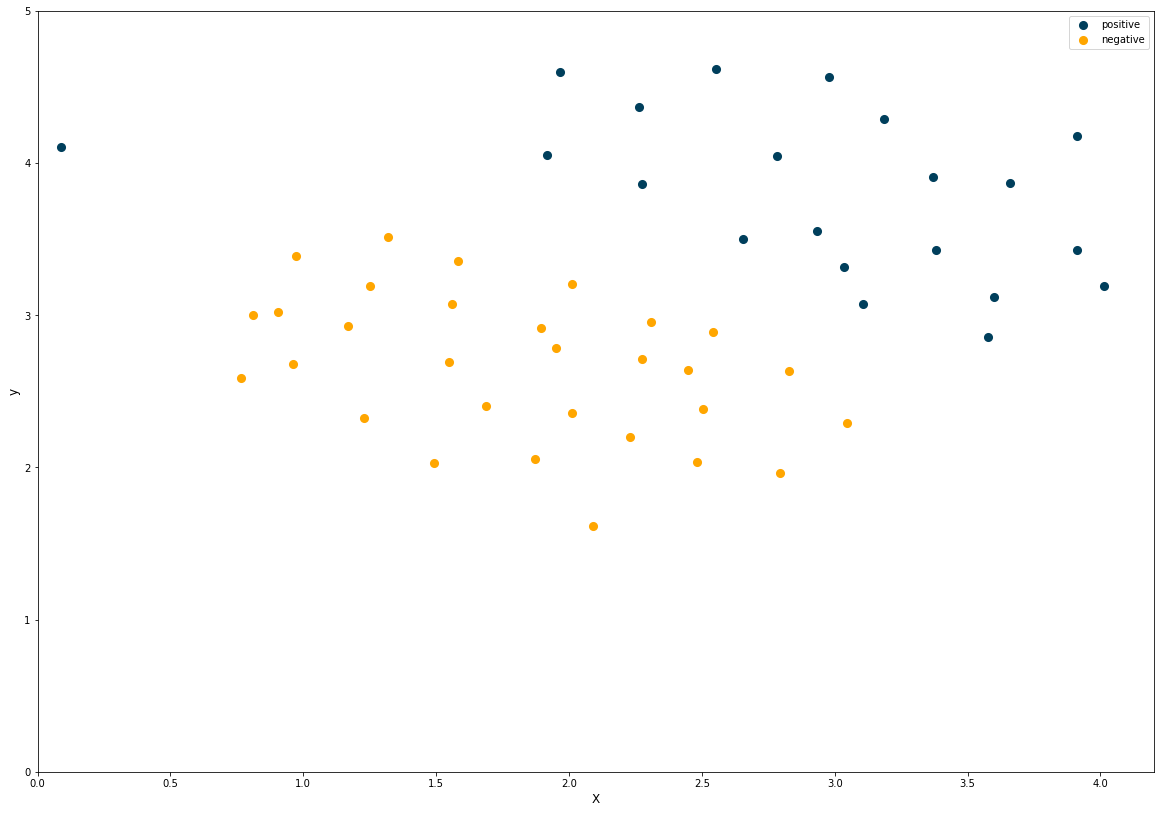

In [38]:
data1 = loadmat(datapath_1)
X = data1['X']
y = data1['y']
plot_data(X, y, 'X', 'y', 'positive', 'negative', 0, 4.2, 0, 5)

Assuming datapath_1 is the file path of a MATLAB file that contains variables named X and y, the code loads these variables using scipy.io.loadmat and stores them in the numpy arrays X and y. It then calls the plot_data function with these arrays and several other arguments to create a scatter plot of the data.

The plot_data function creates a scatter plot of the data points in X with their corresponding labels in y. The x-axis of the plot is labeled 'X' and the y-axis is labeled 'y'. Data points with label 1 are labeled 'positive' and are plotted in blue, while data points with label 0 are labeled 'negative' and are plotted in orange. The x-axis limits are set from 0 to 4.2, and the y-axis limits are set from 0 to 5. The resulting plot should show the distribution of the data points in the two-dimensional space defined by X, with the positive and negative points plotted in different colors.

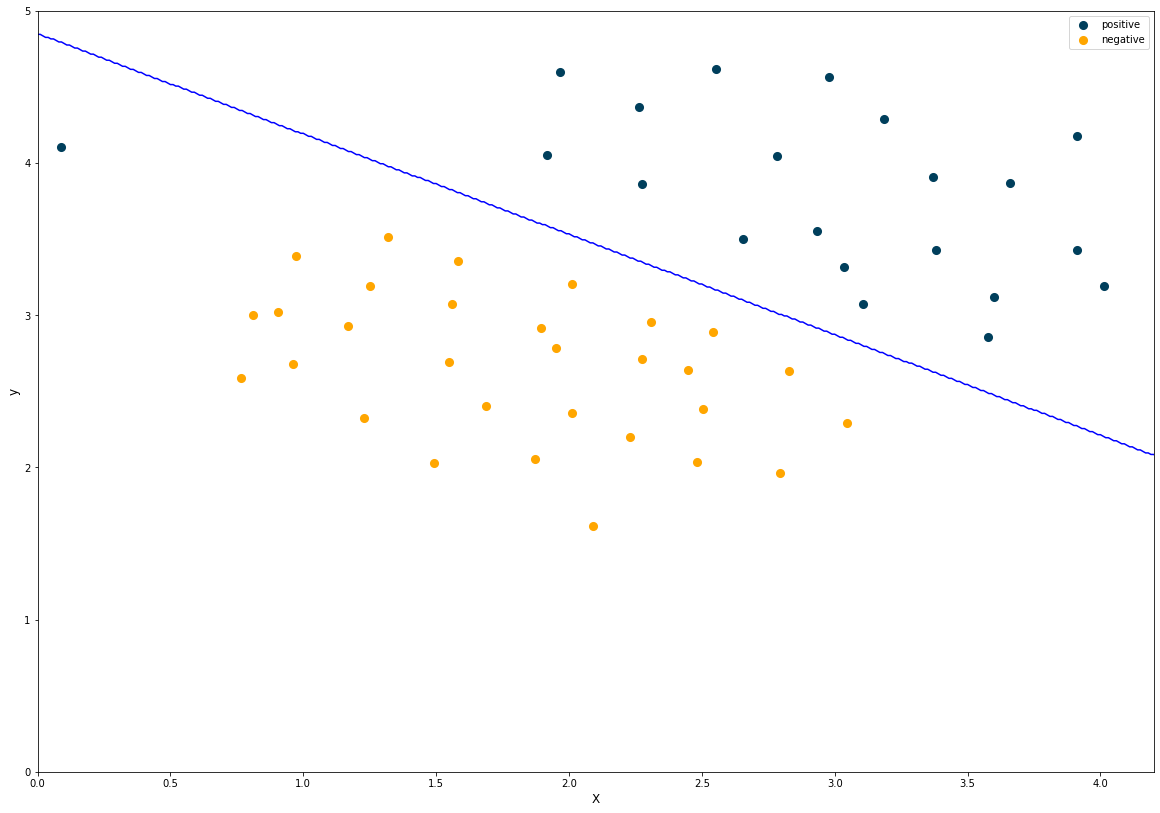

In [42]:
from sklearn import svm

#Use C=1 regularization parameter
clf = svm.SVC(kernel='linear', C=1.0, decision_function_shape='ovr')
clf.fit(X,y.ravel())

#Plot the Data as well as boundry
plot_data(X,y, 'X', 'y', 'positive', 'negative', 0, 4.2, 0, 5)

#Plot hyperplane
x_1, x_2 = np.meshgrid(np.arange(0.0, 5.0, 0.01), np.arange(0.0, 5.0, 0.01))
z = clf.predict(np.c_[x_1.ravel(), x_2.ravel()])
z = z.reshape(x_1.shape)
plt.contour(x_1, x_2, z, [0.5], colors = 'b')

linear Support Vector Machine (SVM) using Scikit-Learn library's svm.SVC class with the 'linear' kernel and C=1.0 regularization parameter.

After training the classifier, you are plotting the data using plot_data function with X and y as inputs along with other parameters to specify the plot details such as axis labels and color scheme.

To plot the decision boundary or hyperplane, you are creating a meshgrid of x_1 and x_2 coordinates using np.meshgrid, and then predicting the class labels for each point in the meshgrid using the trained classifier clf.predict(np.c_[x_1.ravel(), x_2.ravel()]).

The predicted labels are reshaped to the same shape as the meshgrid, and then plotted using plt.contour with the contour level set to 0.5 (i.e., the decision boundary). The color of the contour is set to 'b' (blue).

Overall, this code seems to train a linear SVM classifier on a binary classification problem and visualize the decision boundary. However, it is missing some important details such as importing necessary libraries (e.g., matplotlib, numpy), defining the plot_data function, and loading the data into X and y variables.

##SVM With Large Regularization


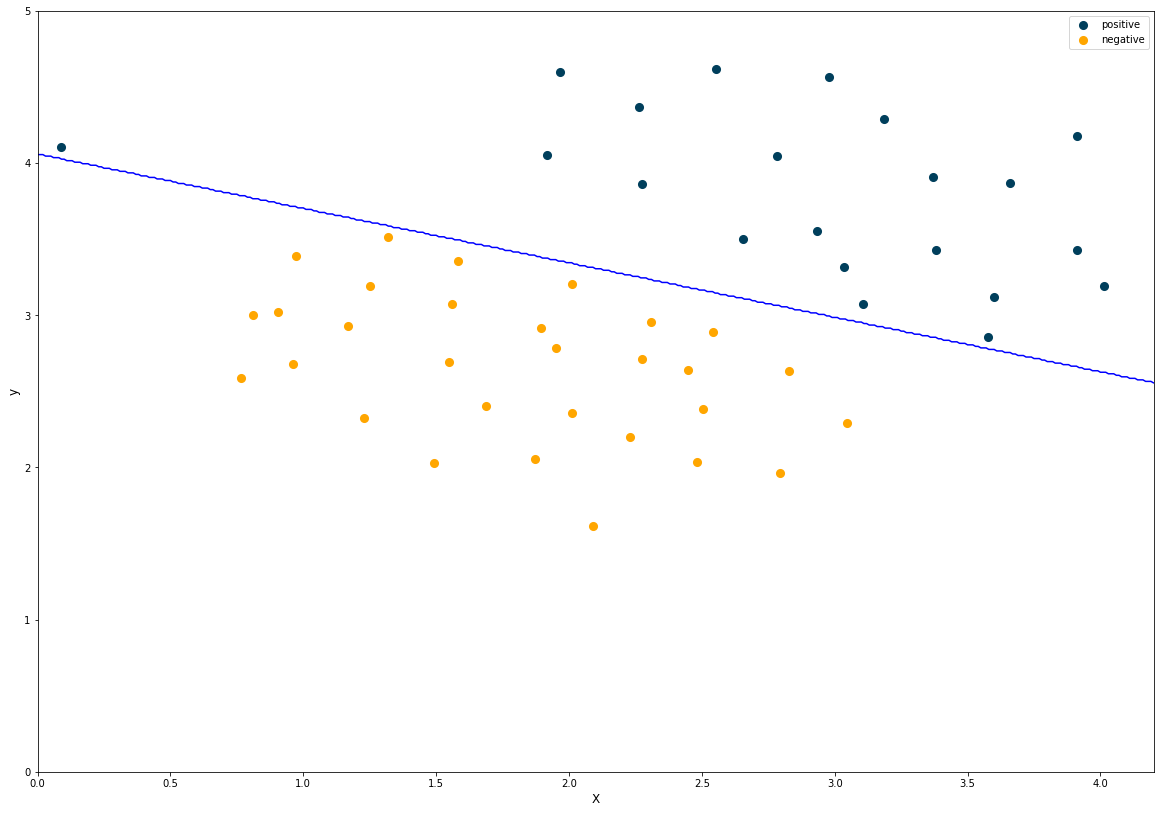

In [44]:
#Use C=100 regularization parameter
clf = svm.SVC(kernel='linear', C=100, decision_function_shape='ovr')
clf.fit(X,y.ravel())

#Plot the Data as well as boundry
plot_data(X,y, 'X', 'y', 'positive', 'negative', 0, 4.2, 0, 5)

#Plot hyperplane
x_1, x_2 = np.meshgrid(np.arange(0.0, 5.0, 0.01), np.arange(0.0, 5.0, 0.01))
z = clf.predict(np.c_[x_1.ravel(), x_2.ravel()])
z = z.reshape(x_1.shape)
plt.contour(x_1, x_2, z, [0.5], colors = 'b')

linear Support Vector Machine (SVM) using Scikit-Learn library's svm.SVC class with the 'linear' kernel and C=1.0 regularization parameter.

After training the classifier, you are plotting the data using plot_data function with X and y as inputs along with other parameters to specify the plot details such as axis labels and color scheme.

To plot the decision boundary or hyperplane, you are creating a meshgrid of x_1 and x_2 coordinates using np.meshgrid, and then predicting the class labels for each point in the meshgrid using the trained classifier clf.predict(np.c_[x_1.ravel(), x_2.ravel()]).

The predicted labels are reshaped to the same shape as the meshgrid, and then plotted using plt.contour with the contour level set to 0.5 (i.e., the decision boundary). The color of the contour is set to 'b' (blue).

Overall, this code seems to train a linear SVM classifier on a binary classification problem and visualize the decision boundary. However, it is missing some important details such as importing necessary libraries (e.g., matplotlib, numpy), defining the plot_data function, and loading the data into X and y variables.

##SVM With Non-Linear Boundary 

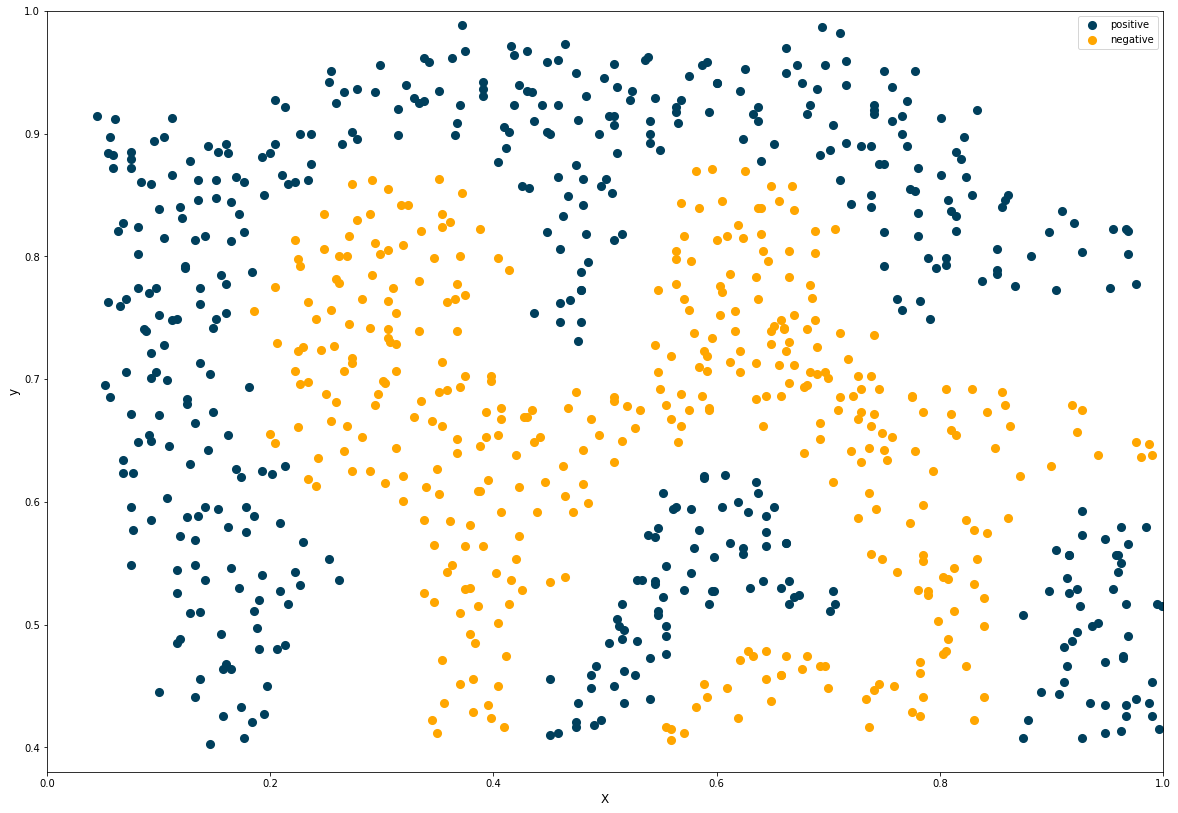

In [45]:
data2 = loadmat(datapath_2)
X_2 = data2['X']
y_2 = data2['y']

plot_data(X_2, y_2, 'X', 'y', 'positive', 'negative', 0, 1.0, 0.38, 1)


loading data from a .mat file using Scipy library's loadmat function and storing the data in X_2 and y_2 variables.

After loading the data, you are calling the plot_data function with X_2 and y_2 as inputs along with other parameters to specify the plot details such as axis labels and color scheme.

Based on the input arguments of the plot_data function, it seems like this function is designed to plot a scatter plot of the input data with two classes, where positive and negative classes are labeled using strings 'positive' and 'negative' respectively.

The plot is displayed within the x-axis and y-axis limits specified by the last four input arguments to the function. The first two arguments 'X' and 'y' are used as axis labels.

Overall, this code to load data from a .mat file and plot it using the plot_data function. However, it is missing some important details such as importing necessary libraries (e.g., matplotlib, scipy), defining the plot_data function, and providing information about the content of the .mat file (e.g., variable names, data format).

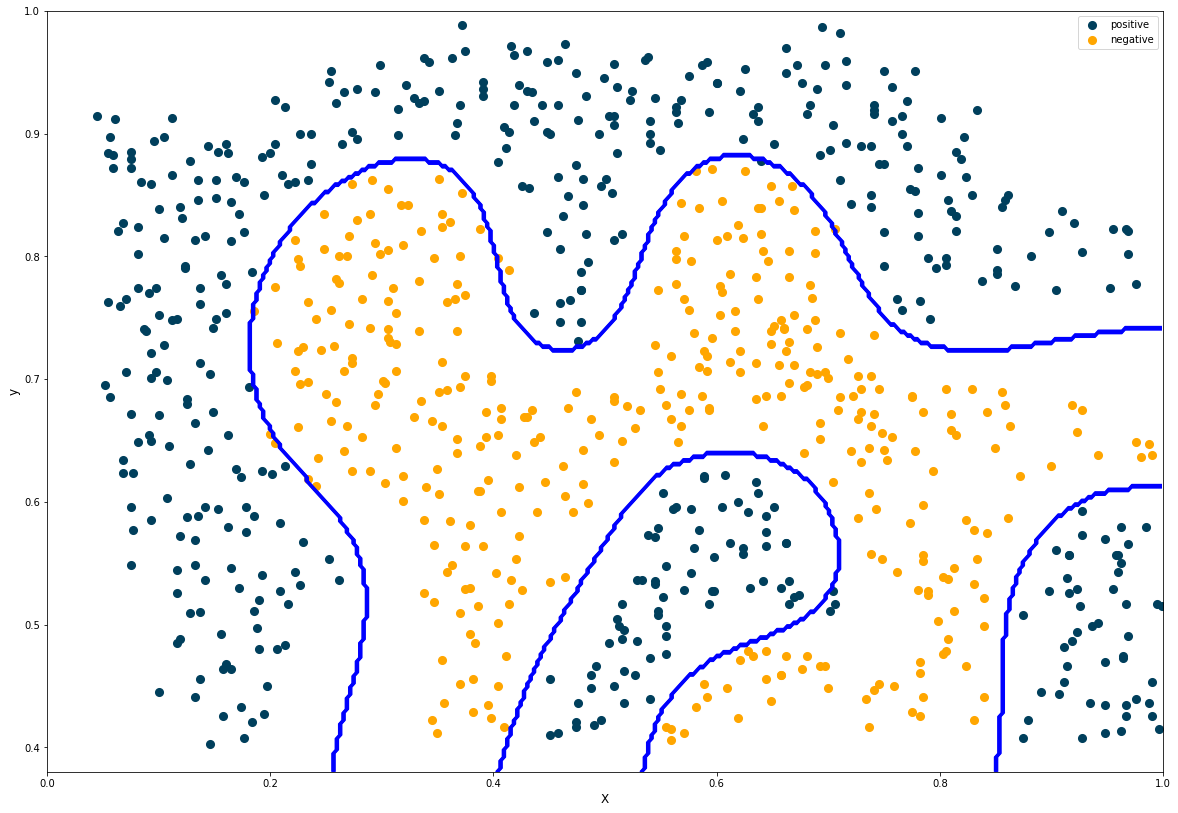

In [47]:
sigma = 0.1
gamma = 1/(2 * sigma**2)

clfg = svm.SVC(kernel='rbf', gamma=gamma, C=1.0, decision_function_shape='ovr')
clfg.fit(X_2, y_2.ravel())

plot_data(X_2, y_2, 'X', 'y', 'positive', 'negative', 0, 1.0, 0.38, 1)

x_1, x_2 = np.meshgrid(np.arange(0.0, 1.0, 0.003), np.arange(0.38, 1.0, 0.003)) 
z = clfg.predict(np.c_[x_1.ravel(), x_2.ravel()])
z = z.reshape(x_1.shape)
plt.contour(x_1, x_2, z, colors='b')

First, you are defining the hyperparameter sigma and then calculating the corresponding gamma value for the RBF kernel.

Then, you are creating an SVM classifier clfg with the RBF kernel, gamma, C=1.0 regularization parameter, and decision function shape set to 'ovr'. You are training the classifier on the X_2 and y_2 data using the fit method.

Next, you are plotting the X_2 and y_2 data using the plot_data function with specific axis labels and color scheme.

To plot the decision boundary or contour, you are creating a meshgrid of x_1 and x_2 coordinates using np.meshgrid with a step size of 0.003, and then predicting the class labels for each point in the meshgrid using the trained classifier clfg.predict(np.c_[x_1.ravel(), x_2.ravel()]).

The predicted labels are reshaped to the same shape as the meshgrid, and then plotted using plt.contour with the default contour level (i.e., separating the classes). The color of the contour is set to 'b' (blue).

Overall, this code seems to train an SVM classifier with an RBF kernel on a binary classification problem and visualize the decision boundary. However, it is missing some important details such as importing necessary libraries (e.g., matplotlib, numpy), defining the plot_data function, and loading the data into X_2 and y_2 variables from the Matlab file using loadmat function from Scipy.

##SVM With Cross-Validation

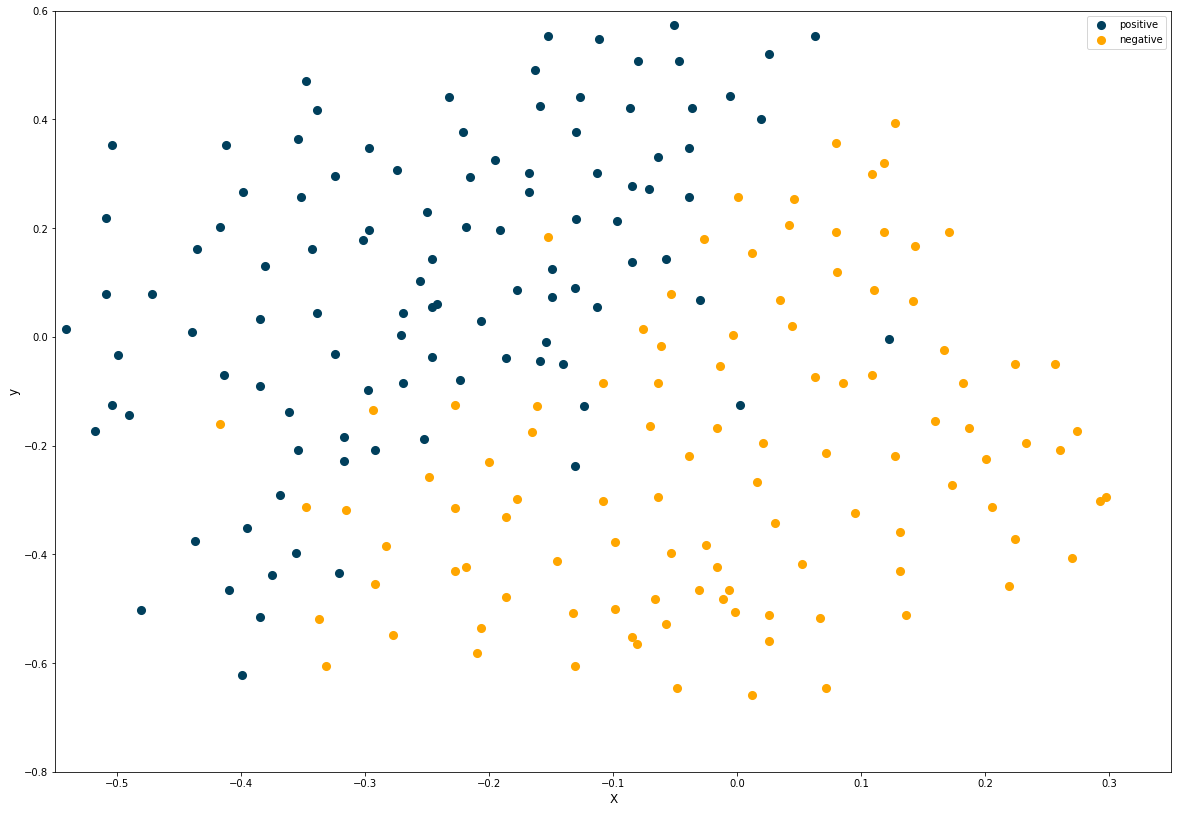

In [50]:
data3 = loadmat(datapath_3)
X_3 = data3['X']
y_3 = data3['y']

plot_data(X_3, y_3, 'X', 'y', 'positive', 'negative', -0.55, 0.35, -0.8, 0.6)

loading a dataset from a Matlab file using Scipy's loadmat function and assigning the input features to X_3 and the target variable to y_3.

plotting the X_3 and y_3 data using the plot_data function with specific axis labels and color scheme. The plot limits for x-axis are set from -0.55 to 0.35, and the plot limits for y-axis are set from -0.8 to 0.6.

Overall, this code seems to load and plot a binary classification dataset. However, it is missing some important details such as importing necessary libraries (e.g., matplotlib, numpy), defining the plot_data function, and specifying the datapath_3 variable to the correct path where the Matlab file is located.

In [53]:
sigma = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
C = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]

errors = list()
sigma_c = list()

for each in sigma:
  for each_c in C:
    clf = svm.SVC(kernel='rbf', gamma=1/(2*(each**2)), C=each_c, decision_function_shape='ovr')
    clf.fit(X_3, y_3.ravel())
    errors.append(clf.score(data3['Xval'], data3['yval'].ravel()))
    sigma_c.append((each, each_c))


This code defines two lists sigma and C, which contain different values for the hyperparameters of the SVM model. Then, it initializes two empty lists: errors to store the cross-validation error of the SVM model for each combination of hyperparameters, and sigma_c to store the corresponding hyperparameter values that result in the minimum cross-validation error.

The code then iterates over each combination of sigma and C, initializes an SVM model with a radial basis function kernel and the given hyperparameters, and fits the model to the X_3 and y_3 data. The score method of the SVM model is then used to calculate the cross-validation accuracy of the model on the validation set, which is stored in the errors list. Finally, the tuple of (sigma, C) is appended to the sigma_c list.

Overall, this code performs a grid search over a range of hyperparameters for the SVM model and stores the cross-validation errors and corresponding hyperparameter values in lists.

In [54]:
index = np.argmax(errors)
sigma_max, c_max = sigma_c[index]
print(f"The optimal value of sigma is: {sigma_max}")
print(f"The optimal value of c is: {c_max}")


The optimal value of sigma is: 0.1
The optimal value of c is: 1


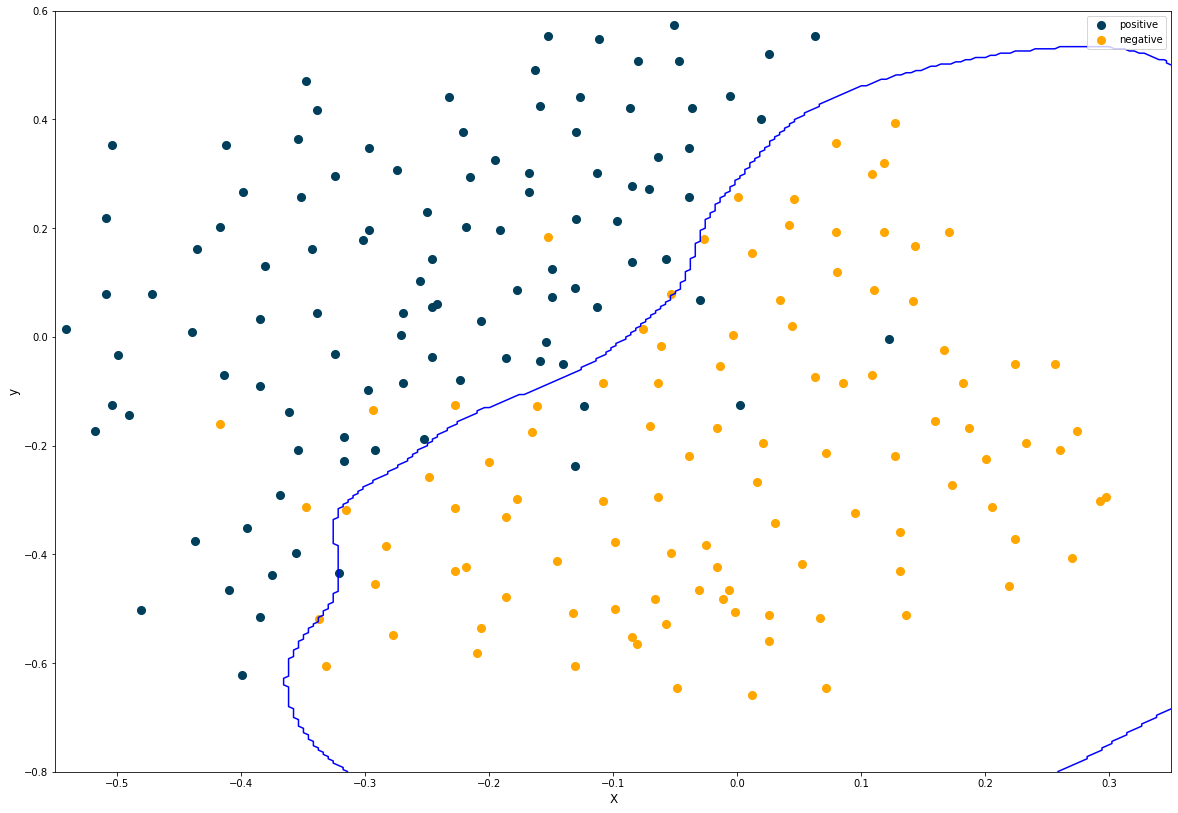

In [55]:
sigma = 0.1
gamma = 1/(2*sigma**2)

optimal_clf = svm.SVC(kernel='rbf', gamma=gamma, C=1.0, decision_function_shape='ovr')
optimal_clf.fit(X_3, y_3.ravel())

plot_data(X_3, y_3, 'X', 'y', 'positive', 'negative', -0.55, 0.35, -0.8, 0.6)

x_1, x_2 = np.meshgrid(np.arange(-0.6, 0.4, 0.004), np.arange(-0.8, 0.6, 0.004))
z = optimal_clf.predict(np.c_[x_1.ravel(), x_2.ravel()])
z = z.reshape(x_1.shape)
plt.contour(x_1, x_2, z, [0.5], colors='b')


This code sets the optimal hyperparameters for the SVM model on X_3 and y_3, using a radial basis function kernel with a gamma value of 1/(2*sigma**2) and a regularization parameter C of 1.0. The SVM model is then fit to the data using these hyperparameters.

The code then plots the data using the plot_data function, and creates a mesh grid over the range of the data using np.meshgrid. The SVM model is then used to predict the class labels for each point in the mesh grid using the predict method, and the resulting class labels are reshaped to match the shape of the mesh grid.

Finally, the contour method of plt is used to draw the decision boundary of the SVM model on the plot, with a contour level of 0.5 and a blue color.

Overall, this code visualizes the decision boundary of the SVM model with the optimal hyperparameters on the X_3 and y_3 data, allowing us to see how well the model separates the positive and negative examples.

##WE FOUND OUR BEST BOUNDARY FROM SVM

##Span Classification

In [60]:
spam_train = loadmat(datapath_train)
spam_test = loadmat(datapath_test)

C = 0.1

X_train = spam_train['X']
y_train = spam_train['y']

X_test = spam_test['Xtest']
y_test = spam_test['ytest']

clf_spam = svm.SVC(kernel='linear', C=C, decision_function_shape='ovr')
clf_spam.fit(X_train,y_train.ravel())

train_acc = clf_spam.score(spam_train['X'],spam_train['y'].ravel())
test_acc = clf_spam.score(X_test, y_test.ravel())

print(f"Traning Accuracy = {train_acc*100}")
print(f"Test Accuracy = {test_acc*100}")


Traning Accuracy = 99.825
Test Accuracy = 98.9


spam_train = loadmat(datapath_train) and spam_test = loadmat(datapath_test) load the train and test datasets in MATLAB format into the variables spam_train and spam_test, respectively. The paths to the datasets are assumed to be stored in the variables datapath_train and datapath_test.

C = 0.1 sets the regularization parameter C to 0.1.

X_train = spam_train['X'] and y_train = spam_train['y'] extract the feature matrix and the class labels of the training set from spam_train.

X_test = spam_test['Xtest'] and y_test = spam_test['ytest'] extract the feature matrix and the class labels of the test set from spam_test.

clf_spam = svm.SVC(kernel='linear', C=C, decision_function_shape='ovr') creates an SVM classifier with a linear kernel, regularization parameter C set to 0.1, and a one-vs-rest decision function strategy.

clf_spam.fit(X_train,y_train.ravel()) trains the SVM classifier on the training set X_train with corresponding class labels y_train.ravel().

train_acc = clf_spam.score(spam_train['X'],spam_train['y'].ravel()) calculates the accuracy of the trained classifier on the training set.

test_acc = clf_spam.score(X_test, y_test.ravel()) calculates the accuracy of the trained classifier on the test set.

print(f"Traning Accuracy = {train_acc*100}") and print(f"Test Accuracy = {test_acc*100}") print the training and test accuracies, respectively, as percentages.

Overall, the code performs binary classification on a spam dataset using SVM with a linear kernel and evaluates the accuracy of the classifier on both the training and test sets.




